In [1]:
# Importações das Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# %matplotlib notebook

# Módulo 6 tarefa 1

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

In [2]:
df = pd.read_csv('sinasc_RO_2019.csv') #Lendo o CSV passado na Aula1.
df.head() #Amostra dos dados do CSV acima

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [3]:
df.info() #Quantidade de linhas, colunas, dados, dtypes dos dados, nome das colunas.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

####  2) Monte um gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

In [4]:
def legenda(grafico, titulo): #Fórmula para colocar legenda no gráfico.
    grafico
    
    ax = plt.gca()  # Obter o eixo atual.
    
    for p in ax.patches: #for para criar a legenda.
        ax.annotate(f'{round(p.get_height(),2)}', xy=(p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
    
    plt.title(titulo) #Título do gráfico.

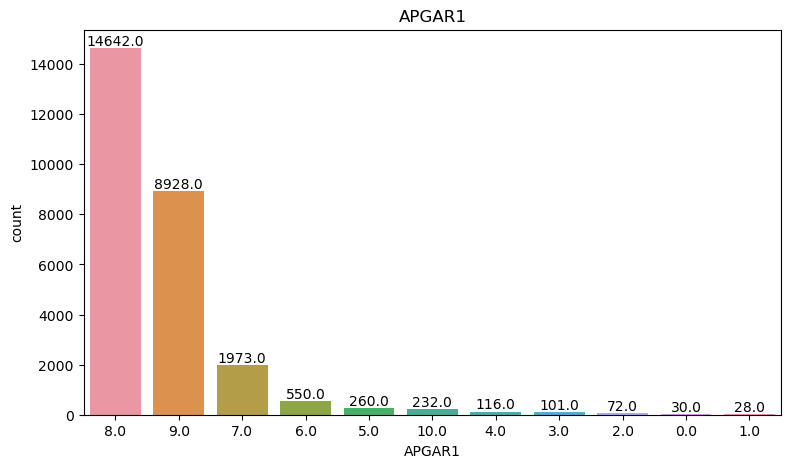

In [5]:
#APGAR1
plt.rc('figure', figsize=(9,5)) #Configuração do tamanho da figura.
legenda(sns.countplot(x='APGAR1', data=df, order=df['APGAR1'].value_counts().index),'APGAR1') #Adicionando countplot.

plt.show()

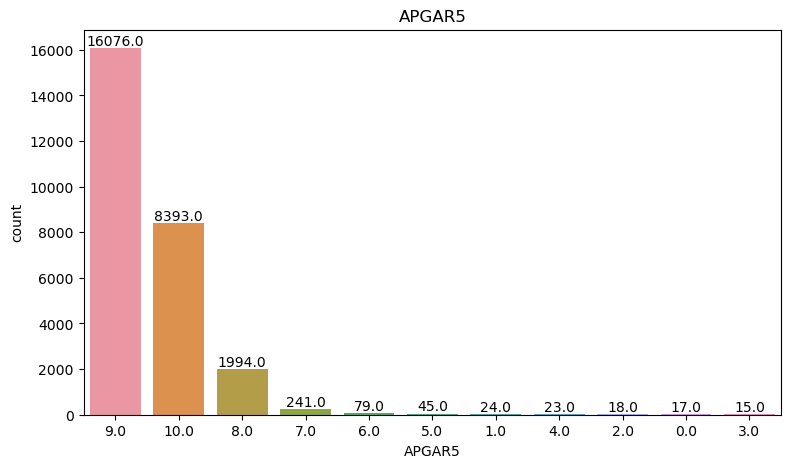

In [6]:
#APGAR5
plt.close('all') #Fechando os gráficos anteriores.

plt.rc('figure', figsize=(9,5)) #Configuração do tamanho da figura.
legenda(sns.countplot(x='APGAR5', data=df, order=df['APGAR5'].value_counts().index),'APGAR5') #Adicionando countplot.

plt.show()

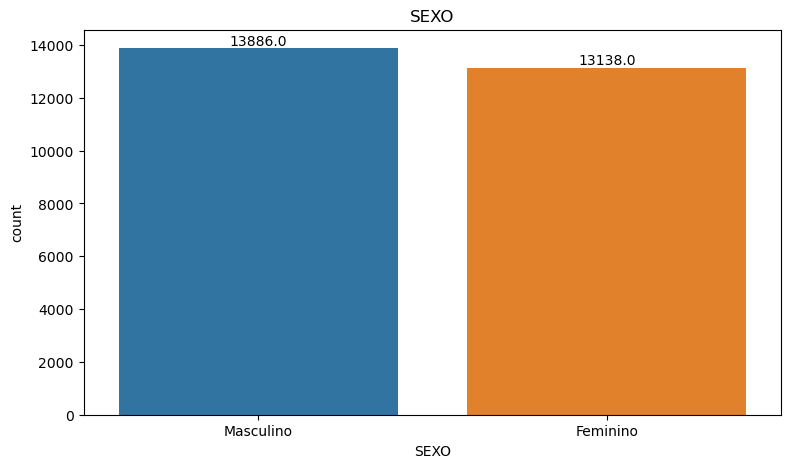

In [7]:
#SEXO
plt.close('all') #Fechando os gráficos anteriores.

legenda(sns.countplot(x='SEXO', data=df, order=df['SEXO'].value_counts().index),'SEXO') #Adicionando countplot.

plt.show()

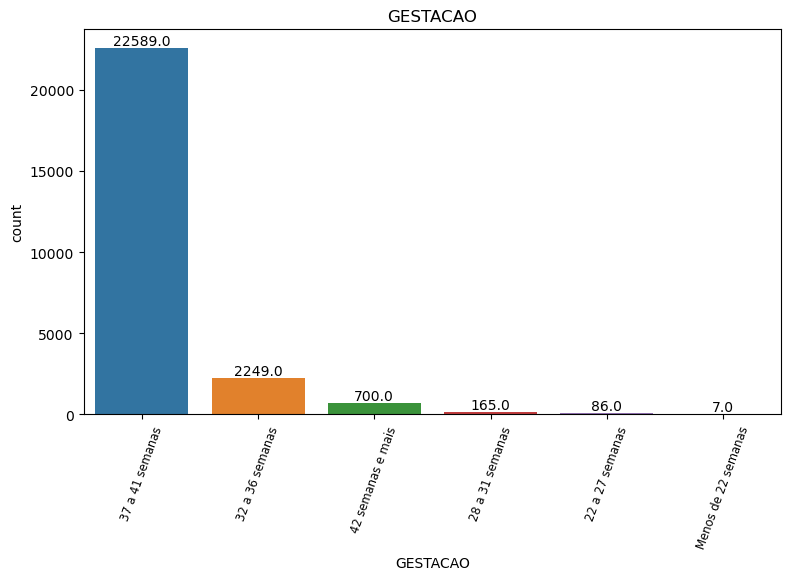

In [8]:
#GESTACAO
plt.close('all') #Fechando os gráficos anteriores.

legenda(sns.countplot(x='GESTACAO', data=df, order=df['GESTACAO'].value_counts().index),'GESTACAO') #Adicionando countplot.
plt.tick_params(axis="x", rotation=70, labelsize='small') #Ajustando label x do gráfico ('GESTACAO').

plt.show()

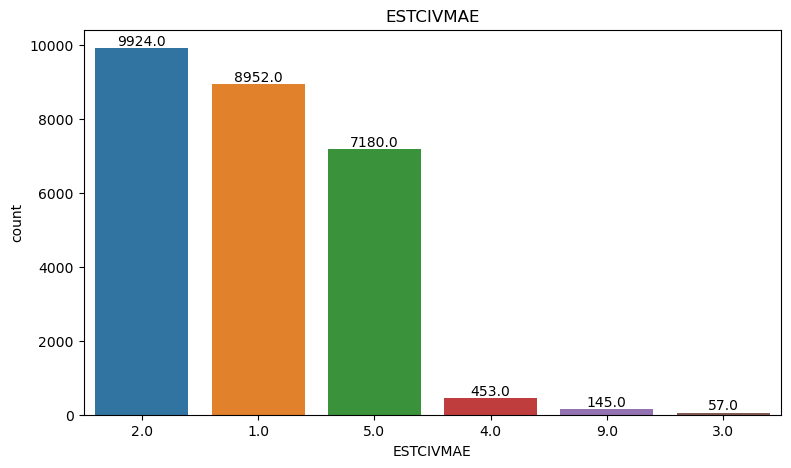

In [9]:
#ESTCIVMAE
plt.close('all') #Fechando os gráficos anteriores.

legenda(sns.countplot(x='ESTCIVMAE', data=df, order=df['ESTCIVMAE'].value_counts().index),'ESTCIVMAE') #Adicionando countplot.

plt.show()

#### 3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

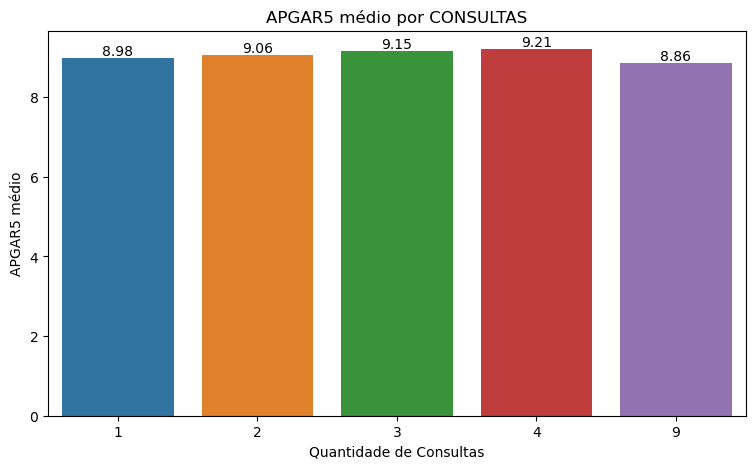

In [10]:
plt.close('all') #Fechando os gráficos anteriores.

legenda(sns.barplot(x='CONSULTAS', y='APGAR5', data=df, errorbar=('ci', False)),
        'APGAR5 médio por CONSULTAS') #Adicionando o gráfico barplot para 'APGAR5' médio por 'CONSULTAS'.

plt.xlabel('Quantidade de Consultas') #Label x.
plt.ylabel('APGAR5 médio') #Label y.

plt.show()

####  4) Monte um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

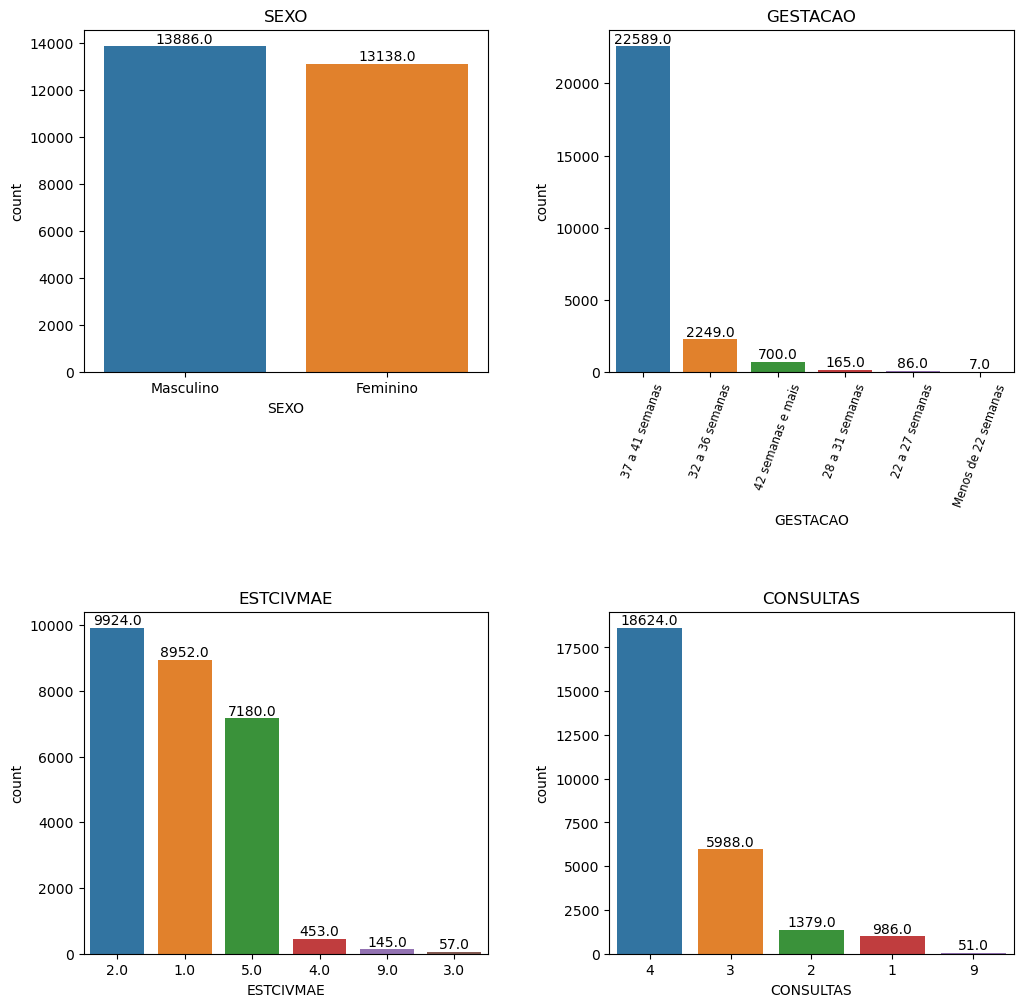

In [12]:
plt.close('all') #Fechando os gráficos anteriores.

plt.subplots_adjust(wspace=0.3, hspace=0.7) #Ajustando distancia entre os gráficos.
plt.rc('figure', figsize=(12,12)) #Configuração do tamanho da figura.

colunas = ['SEXO', 'GESTACAO', 'ESTCIVMAE', 'CONSULTAS'] #Colunas utilizadas.

A = 0 #Posição do gráfico.

for i in colunas: #for para adicionar todos os gráficos.
    A += 1 #Posição do primeiro gráfico em diante.
    plt.subplot(2, 2, A) #Adicionando subplots na figura matriz(2, 2).
    legenda(sns.countplot(x=i, data=df, order=df[i].value_counts().index),i) #Fórmula legenda.

plt.subplot(2, 2, 2).tick_params(axis="x", rotation=70, labelsize='small') #Ajustando label x do gráfico ('GESTACAO').